In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
data.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [7]:
# Calculate mean, median, mode, and standard deviation
statistics = data[numerical_columns].agg(['mean', 'median', 'std', lambda x: x.mode().iloc[0]])
statistics.rename(index={'<lambda_0>': 'mode'}, inplace=True)
statistics


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
<lambda>,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


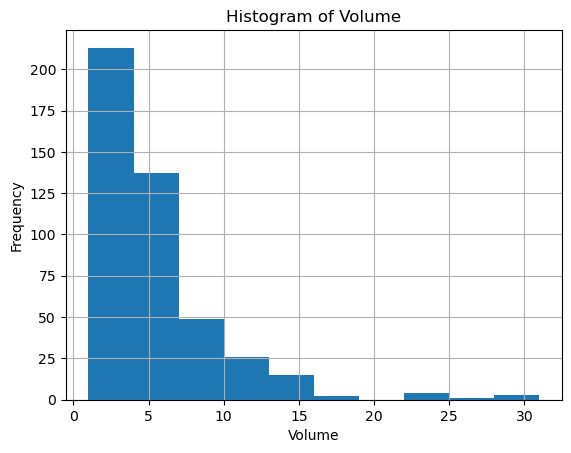

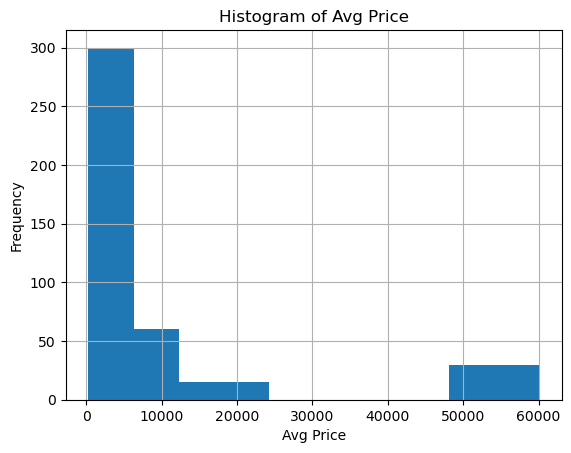

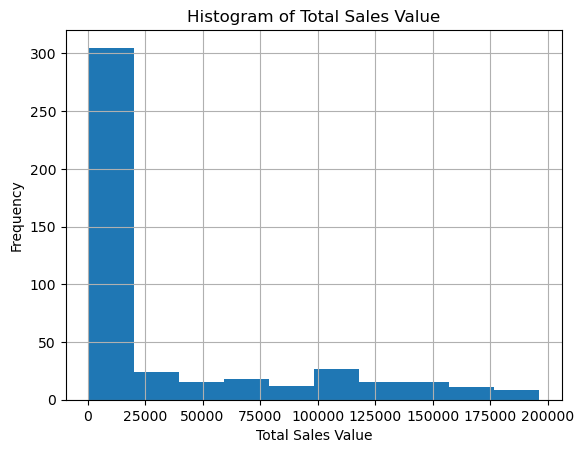

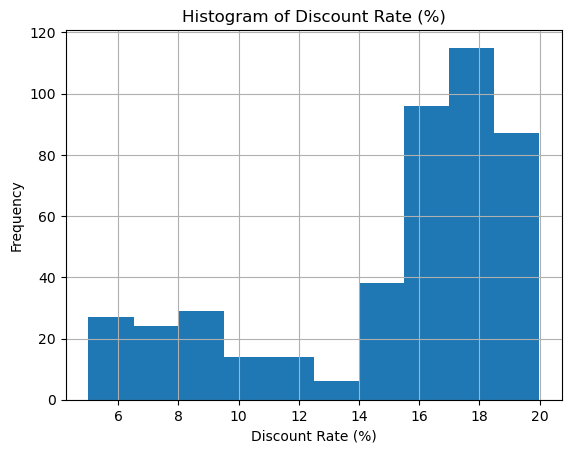

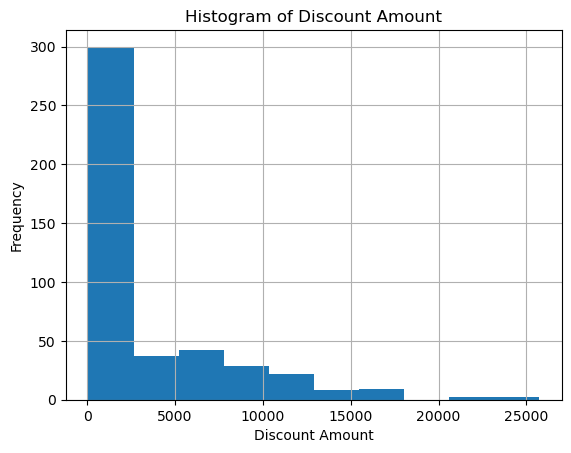

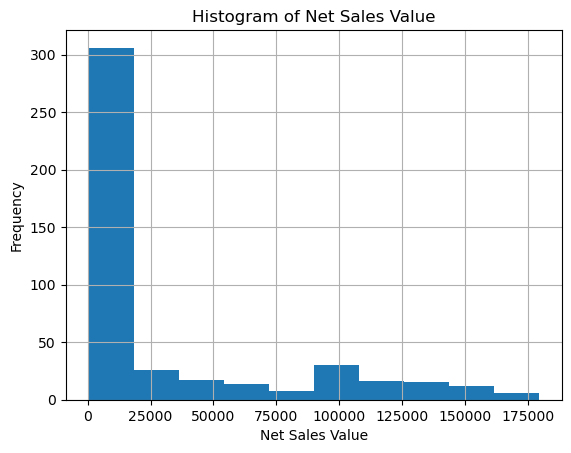

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure()
    data[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


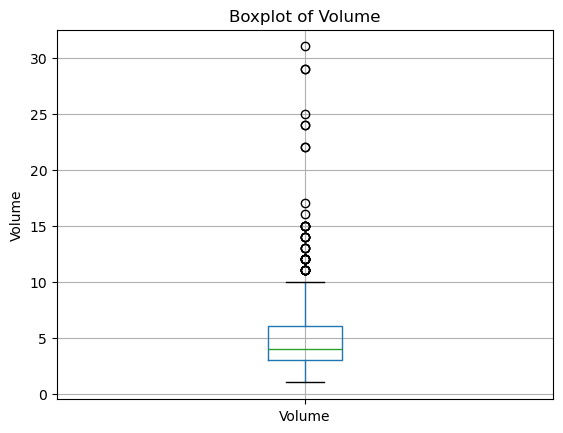

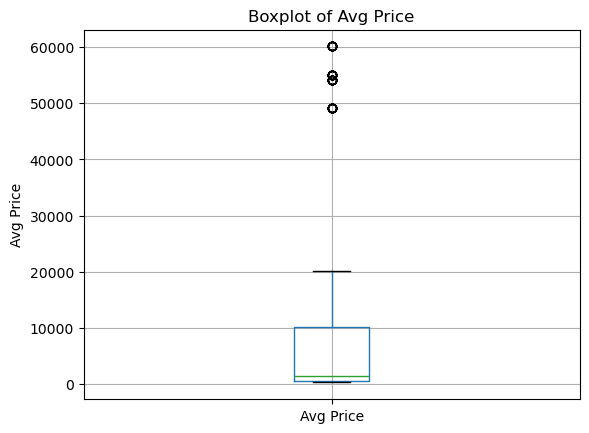

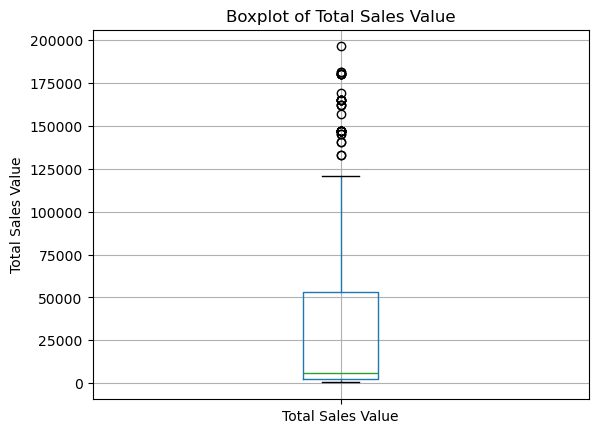

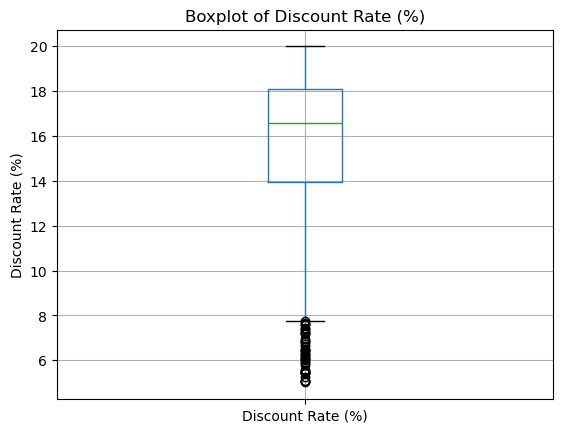

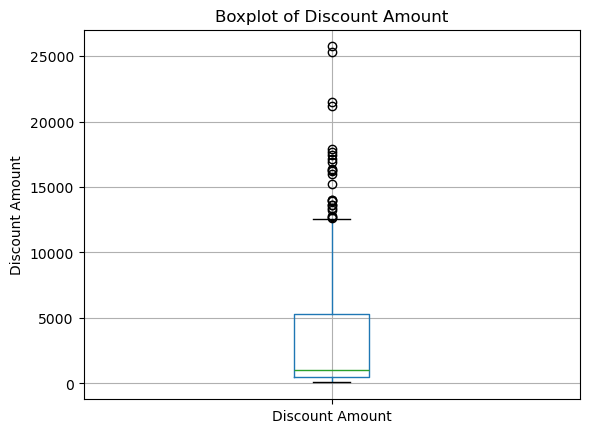

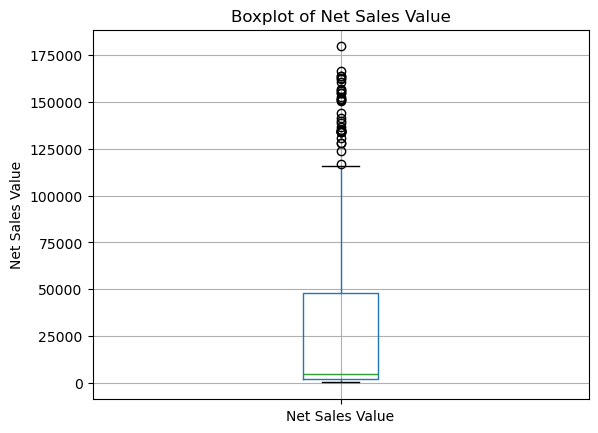

In [11]:
# Create boxplots for numerical variables
for col in numerical_columns:
    plt.figure()
    data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()


In [13]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns


Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

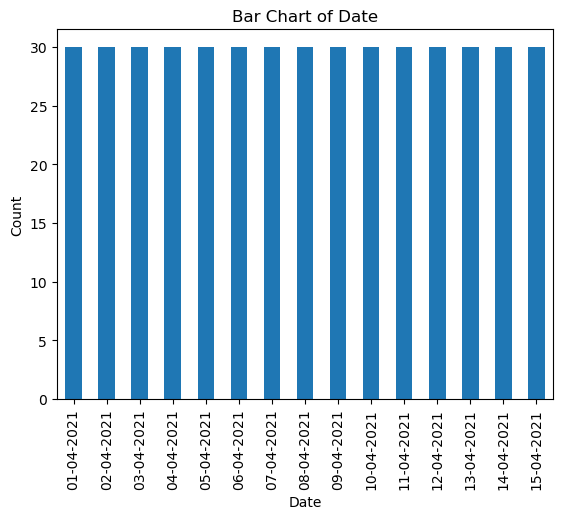

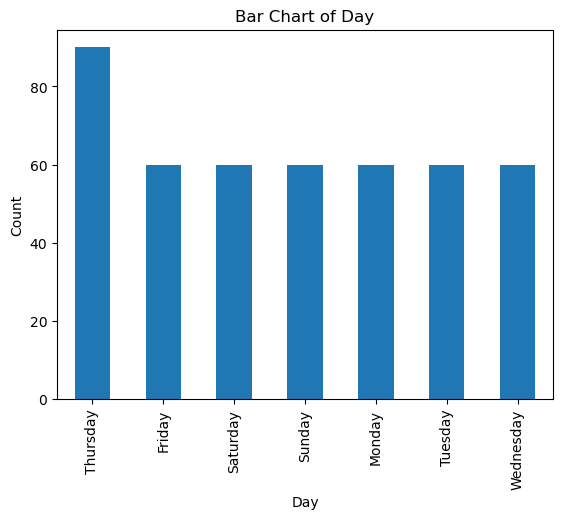

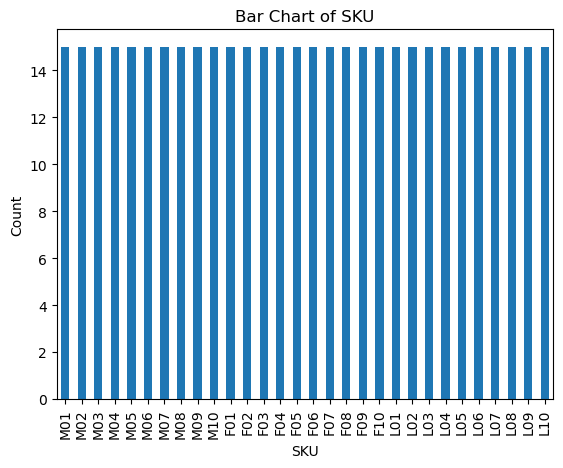

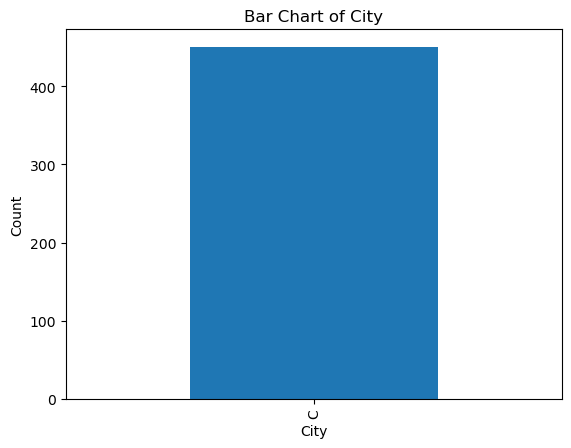

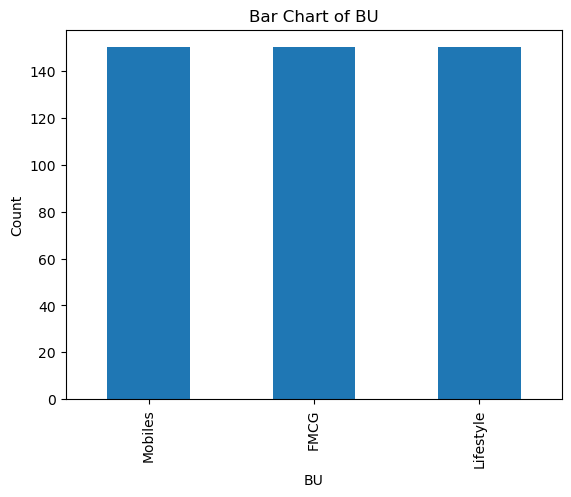

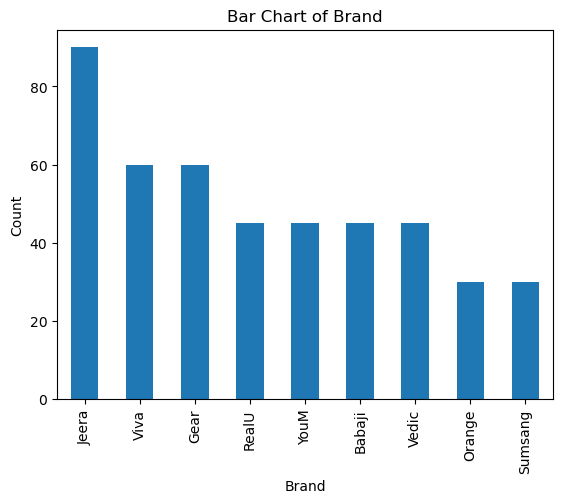

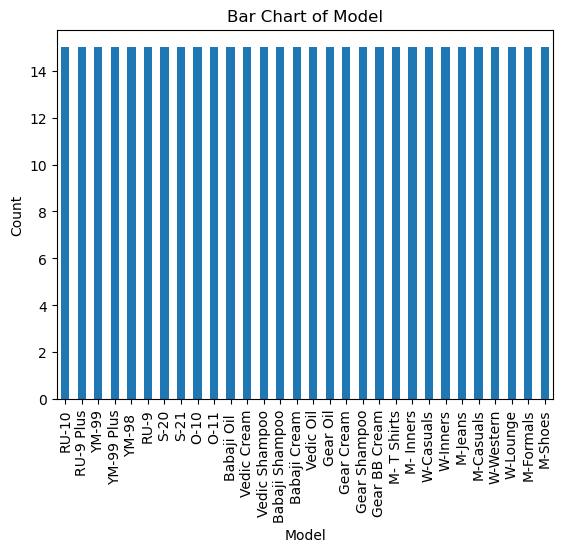

In [15]:
# Create bar charts to visualize the frequency of each category
for col in categorical_columns:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [17]:
# Standardize the numerical columns
standardized_data = data[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Show before and after comparison
print("Before Standardization:\n", data[numerical_columns].head())
print("\nAfter Standardization:\n", standardized_data.head())


Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552   

In [19]:
# Apply one-hot encoding to the categorical columns
encoded_data = pd.get_dummies(data[categorical_columns])

# Display a portion of the transformed dataset
encoded_data.head()


,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
CONCLUSION-----
1)Basic statistics provide insights into the central tendency and dispersion of numerical columns.
2)Data visualizations (histograms, boxplots, bar charts) help identify distribution patterns and outliers.
3)Standardization ensures numerical columns are on a similar scale, improving the dataset's suitability for machine learning models.
4)One-hot encoding transforms categorical variables, making them usable in ML algorithms.